## Hypothesis
To predict the incentive level requested to program washer and drier after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [75]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "AwayS"       "AwayW"       "BillS"      
 [11] "BillW"       "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"    
 [16] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"  
 [21] "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"     
 [26] "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"    
 [31] "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"     
 [36] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [41] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [46] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [51] "HabitG"      "HomeS"       "HomeW"       "HouseholdS"  "INT1"       
 [56] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [61] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [66] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [71] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [76] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [81] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [86] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [91] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [96] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
[101] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[106] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[111] "X.9to5"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       4       5       5       6       7      56 


  1   2   3   4   5   6   7 
 47  34  64 137  41 160 123 

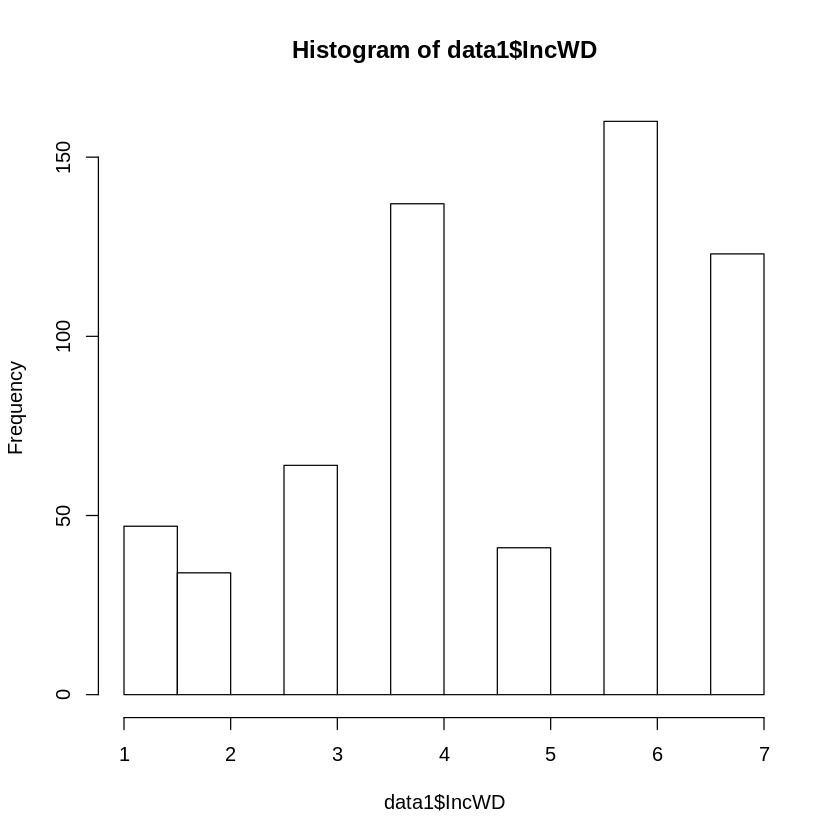

In [76]:
summary(data1$IncWD)
table(data1$IncWD)
hist(data1$IncWD)

In [77]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [78]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 108
[1] 412 108


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.0     5.0     4.7     6.0     7.0 


  1   2   3   4   5   6   7 
 29  22  49  98  24 115  75 

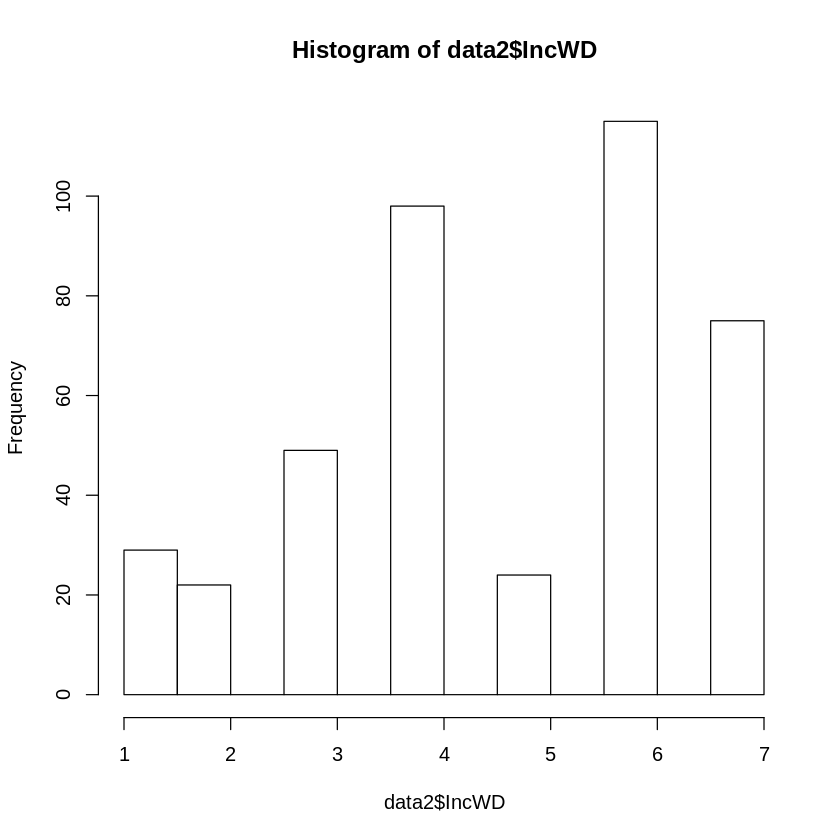

In [79]:
summary(data2$IncWD)
table(data2$IncWD)
hist(data2$IncWD)

In [80]:
sort(names(data2))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"    
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "IncWD"       "Income"      "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

In [81]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Income",
"Educ",
"MC",
"EnergyC",
"PBC",
"SubNorm",
"HabitC",
"ConvB1",
"CashYN")

In [82]:
sort(names(data2))
paste(sort(IVS))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"    
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "IncWD"       "Income"      "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HouseholdS" "Income"     "MC"        
[11] "OwnRent"    "PBC"        "Political"  "SqftCate"   "SubNorm"

In [83]:
data1 <- data2[, which(names(data2) %in% c("IncWD",IVS))];
sort(names(data1))

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HouseholdS" "IncWD"      "Income"    
[11] "MC"         "OwnRent"    "PBC"        "Political"  "SqftCate"  
[16] "SubNorm"

In [84]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [85]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [86]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncWD"      "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Income"     "Educ"      
[11] "EnergyC"    "PBC"        "CashYN"     "MC"         "SubNorm"   
[16] "HabitC"

In [87]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [88]:
hiCor(data2,.7)

<0 x 0 matrix>

In [89]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.16
    ConvB1 EnergyC   PBC   MC SubNorm HabitC
PC1   0.43   -0.39 -0.34 -0.4   -0.36   -0.3
[1] 0.29
    Age OwnRent SqftCate HouseholdS Income
PC2 0.4    0.49     0.51       0.22   0.38
[1] 0.37
    IncWD ConvB1 Gender HouseholdS Income Educ HabitC
PC3 -0.24   0.22   -0.4      -0.34   0.35  0.6   0.21
[1] 0.45
    IncWD  Age Gender HouseholdS Political EnergyC   PBC    MC HabitC
PC4  0.29 0.27   0.36      -0.26      0.58    0.28 -0.26 -0.23  -0.23
[1] 0.52
    IncWD   Age Gender HouseholdS Political EnergyC   PBC CashYN
PC5 -0.45 -0.43   0.21       0.47      0.23    0.31 -0.24  -0.21
[1] 0.59
    OwnRent HouseholdS CashYN HabitC
PC6   -0.23       0.24   0.82  -0.22
[1] 0.65
    ConvB1 Gender Political Income  PBC CashYN SubNorm
PC7  -0.35  -0.31      0.48   0.23 0.29   0.27    -0.5
[1] 0.7
    IncWD  Age OwnRent Political Income    MC HabitC
PC8  0.38 -0.2    -0.3      0.25   0.21 -0.41   0.58
[1] 0.75
    IncWD Gender  Educ   PBC CashYN SubNorm HabitC
PC9 -0.43   0.32 -0.23 -0

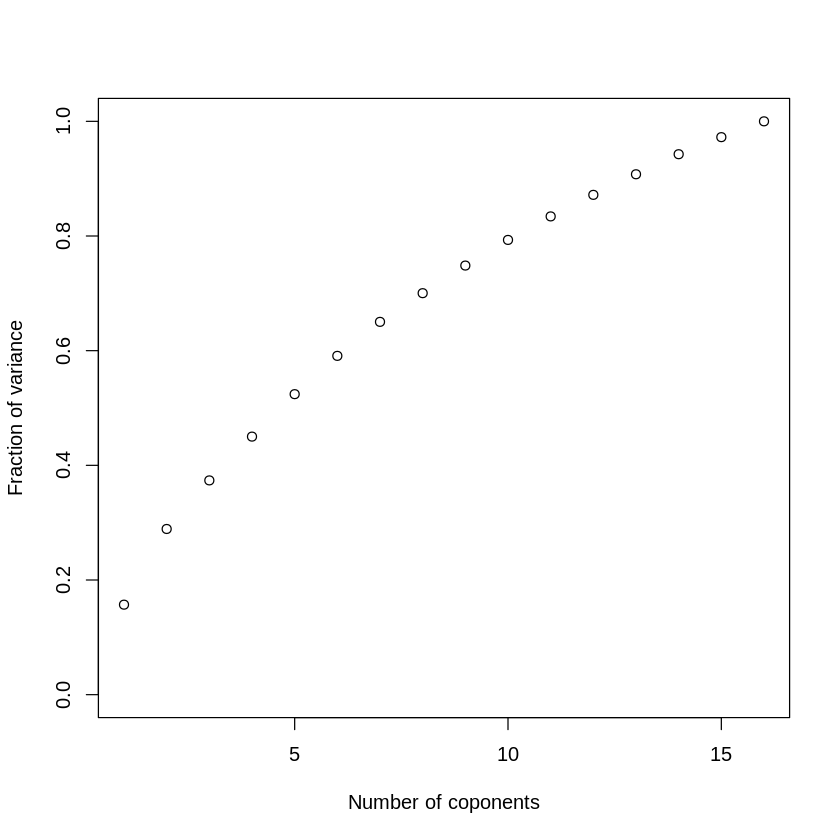

In [90]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [91]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [92]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,6,0.34
ConvB1,2,0.33
OwnRent,5,0.28
MC,14,0.28
EnergyC,11,0.27
SubNorm,15,0.23
Income,9,0.22
HouseholdS,7,0.19
PBC,12,0.19
Age,3,0.17
HabitC,16,0.16


In [93]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [94]:
#IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ConvB1', 'HabitG')
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1")

In [95]:
fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [96]:
table(data2[,"IncWD"])


  1   2   3   4   5   6   7 
 29  22  49  98  24 115  75 

In [97]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.81  -1.17   0.25   1.37   3.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.83746    1.07727    3.56  0.00041 ***
Age          0.04007    0.00841    4.76  2.7e-06 ***
Gender       0.21267    0.18100    1.17  0.24072    
OwnRent     -0.07760    0.19634   -0.40  0.69289    
SqftCate     0.20292    0.09953    2.04  0.04214 *  
HouseholdS   0.02198    0.07765    0.28  0.77725    
Political   -0.05938    0.10691   -0.56  0.57894    
Income      -0.05580    0.05197   -1.07  0.28360    
Educ        -0.03391    0.08347   -0.41  0.68477    
MC          -0.11691    0.09465   -1.24  0.21750    
EnergyC     -0.04656    0.06845   -0.68  0.49675    
PBC          0.05861    0.10246    0.57  0.56759    
SubNorm     -0.06812    0.07050   -0.97  0.33447    
HabitC      -0.06516    0.06798   -0.96  0.33840    
ConvB1       0.10258    0.08491    1.21  0.22769    
---
Signif. c

In [98]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,8.6e+01,86.1251,2.9e+01,1.4e-07
Gender,1,1.4e+00,1.4117,4.7e-01,4.9e-01
OwnRent,1,3.5e-01,0.3506,1.2e-01,7.3e-01
SqftCate,1,1.5e+01,15.3450,5.1e+00,2.4e-02
HouseholdS,1,1.2e+00,1.1504,3.8e-01,5.4e-01
Political,1,2.2e+00,2.1670,7.2e-01,4.0e-01
Income,1,3.9e+00,3.8818,1.3e+00,2.6e-01
Educ,1,2.5e+00,2.5130,8.4e-01,3.6e-01
MC,1,1.9e+01,19.2749,6.4e+00,1.2e-02
EnergyC,1,4.9e+00,4.8912,1.6e+00,2.0e-01


In [99]:
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1","CashYN")

In [100]:
fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [101]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.845 -1.195  0.276  1.399  3.454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.39734    1.11835    3.04   0.0025 ** 
Age          0.03940    0.00841    4.68  3.9e-06 ***
Gender       0.21879    0.18081    1.21   0.2270    
OwnRent     -0.05203    0.19688   -0.26   0.7917    
SqftCate     0.20845    0.09947    2.10   0.0368 *  
HouseholdS   0.02035    0.07755    0.26   0.7931    
Political   -0.05218    0.10689   -0.49   0.6257    
Income      -0.06002    0.05198   -1.15   0.2490    
Educ        -0.03861    0.08342   -0.46   0.6438    
MC          -0.12248    0.09460   -1.29   0.1962    
EnergyC     -0.04977    0.06839   -0.73   0.4672    
PBC          0.05971    0.10232    0.58   0.5598    
SubNorm     -0.06858    0.07040   -0.97   0.3306    
HabitC      -0.06026    0.06798   -0.89   0.3759    
ConvB1       0.10919    0.08492    1.29   0.1992    
CashYNTRUE   

In [102]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,8.6e+01,86.1251,2.9e+01,1.4e-07
Gender,1,1.4e+00,1.4117,4.7e-01,4.9e-01
OwnRent,1,3.5e-01,0.3506,1.2e-01,7.3e-01
SqftCate,1,1.5e+01,15.3450,5.1e+00,2.4e-02
HouseholdS,1,1.2e+00,1.1504,3.8e-01,5.4e-01
Political,1,2.2e+00,2.1670,7.2e-01,4.0e-01
Income,1,3.9e+00,3.8818,1.3e+00,2.6e-01
Educ,1,2.5e+00,2.5130,8.4e-01,3.6e-01
MC,1,1.9e+01,19.2749,6.4e+00,1.2e-02
EnergyC,1,4.9e+00,4.8912,1.6e+00,2.0e-01
